In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
columns = df_train.columns.values

In [9]:
numeric_columns = []
object_columns = []
for item in columns:
    
    if df_train[item].dtype == "object":

        object_columns.append(item)
    else:
        numeric_columns.append(item)

In [10]:
object_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [11]:
numeric_columns

['ID',
 'y',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X1

In [12]:
y_label = df_train.pop('y')

In [13]:
df_merge = pd.concat([df_train, df_test])

In [14]:
df_merge.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
4208,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
interested_columns = ['ID',
 'X10',

 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',

 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 'X133',
 'X134',
 'X135',
 'X136',
 'X137',
 'X138',
 'X139',
 'X140',
 'X141',
 'X142',
 'X143',
 'X144',
 'X145',
 'X146',
 'X147',
 'X148',
 'X150',
 'X151',
 'X152',
 'X153',
 'X154',
 'X155',
 'X156',
 'X157',
 'X158',
 'X159',
 'X160',
 'X161',
 'X162',
 'X163',
 'X164',
 'X165',
 'X166',
 'X167',
 'X168',
 'X169',
 'X170',
 'X171',
 'X172',
 'X173',
 'X174',
 'X175',
 'X176',
 'X177',
 'X178',
 'X179',
 'X180',
 'X181',
 'X182',
 'X183',
 'X184',
 'X185',
 'X186',
 'X187',
 'X189',
 'X190',
 'X191',
 'X192',
 'X194',
 'X195',
 'X196',
 'X197',
 'X198',
 'X199',
 'X200',
 'X201',
 'X202',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X208',
 'X209',
 'X210',
 'X211',
 'X212',
 'X213',
 'X214',
 'X215',
 'X216',
 'X217',
 'X218',
 'X219',
 'X220',
 'X221',
 'X222',

 'X224',
 'X225',
 'X226',
 'X227',
 'X228',
 'X229',
 'X230',
 'X231',
 'X232',
 'X233',
 'X234',

 'X236',
 'X237',
 'X238',
 'X239',
 'X240',
 'X241',
 'X242',
 'X243',
 'X244',
 'X245',
 'X246',
 'X247',
 'X248',
 'X249',
 'X250',
 'X251',
 'X252',
 'X253',
 'X254',
 'X255',
 'X256',
 'X257',
 'X258',
 'X259',
 'X260',
 'X261',
 'X262',
 'X263',
 'X264',
 'X265',
 'X266',
 'X267',

 'X269',
 'X270',
 'X271',
 'X272',
 'X273',
 'X274',
 'X275',
 'X276',
 'X277',
 'X278',
 'X279',
 'X280',
 'X281',
 'X282',
 'X283',
 'X284',
 'X285',
 'X286',
 'X287',
 'X288',


 'X291',
 'X292',

 'X294',
 'X295',
 'X296',

 'X298',
 'X299',
 'X300',
 'X301',
 'X302',
 'X304',
 'X305',
 'X306',
 'X307',
 'X308',
 'X309',
 'X310',
 'X311',
 'X312',
 'X313',
 'X314',
 'X315',
 'X316',
 'X317',
 'X318',
 'X319',
 'X320',
 'X321',
 'X322',
 'X323',
 'X324',
 'X325',
 'X326',
 'X327',
 'X328',
 'X329',

 'X331',
 'X332',
 'X333',
 'X334',
 'X335',
 'X336',
 'X337',
 'X338',
 'X339',
 'X340',
 'X341',
 'X342',
 'X343',
 'X344',
 'X345',
 'X346',

 'X348',
 'X349',
 'X350',
 'X351',
 'X352',
 'X353',
 'X354',
 'X355',
 'X356',
 'X357',
 'X358',
 'X359',
 'X360',
 'X361',
 'X362',
 'X363',
 'X364',
 'X365',
 'X366',
 'X367',
 'X368',
 'X369',
 'X370',
 'X371',
 'X372',
 'X373',
 'X374',
 'X375',
 'X376',
 'X377',
 'X378',
 'X379',
 'X380',
 'X382',
 'X383',
 'X384',
 'X385']

In [16]:
dfX0 = pd.get_dummies(df_merge.X0)

In [17]:
dfX1 = pd.get_dummies(df_merge.X1)

In [18]:
dfX2 = pd.get_dummies(df_merge.X2)

In [19]:
dfX3 = pd.get_dummies(df_merge.X3)

In [20]:
dfX4 = pd.get_dummies(df_merge.X4)

In [21]:
dfX5 = pd.get_dummies(df_merge.X5)

In [22]:
dfX6 = pd.get_dummies(df_merge.X6)

In [23]:
dfX8 = pd.get_dummies(df_merge.X8)

In [24]:
df_merge_numeric = df_merge[interested_columns]

In [25]:
df = pd.concat([df_merge_numeric, dfX0, dfX1, dfX2, dfX3, dfX4, dfX5, dfX6, dfX8], axis=1)

In [26]:
df = df.reset_index(drop=True)

# PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=10)

In [29]:
pca.fit(df)  

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
df_PCA = pd.DataFrame(pca.transform(df))

In [31]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9
0,-4208.500008,0.708802,1.061068,2.179773,0.773432,1.458689,0.073415,0.601098,-0.936490,0.162964
1,-4202.499927,-0.214937,-0.682015,0.993220,-0.775407,0.063367,0.198884,1.219854,-0.655781,0.093891
2,-4201.499970,-0.585502,0.180569,3.210697,1.822076,0.196839,3.812458,-1.234128,0.676147,-1.136703
3,-4199.499899,-0.383926,-1.014888,2.800077,2.387403,-0.655025,3.852791,-0.343663,-0.056900,-1.312103
4,-4195.499928,-0.416849,-1.164811,2.698962,2.609717,-0.897264,3.918909,-0.499264,0.128508,-1.965991


In [32]:
y =['a1','b1','c1','d1','e1','f1','g1','h1','i1','j1']

In [33]:
df_PCA.columns = y

In [34]:
df_PCA.tail()

,a1,b1,c1,d1,e1,f1,g1,h1,i1,j1
8413,4201.499950,-2.933831,-0.581634,-0.736796,0.407900,0.017586,-0.675107,-1.910392,0.644032,0.009709
8414,4202.499944,2.215400,0.210039,0.799007,-1.541466,1.488764,0.762771,0.320738,0.574209,-0.911871
8415,4204.500063,-1.317610,-2.331406,-1.810481,0.739618,-0.127940,-0.490452,-1.043492,0.484739,-0.461716
8416,4205.499944,-2.266333,2.095824,-0.535491,-0.708493,-0.176955,0.277865,-0.266292,-0.326071,-0.263659
8417,4207.499963,1.954001,-0.980318,0.609104,-2.760815,1.795441,0.319208,-0.286680,-0.734637,-0.827694


#  ICA

In [35]:
from sklearn.decomposition import  FastICA

In [36]:
ica = FastICA(n_components=10, random_state=42)

In [37]:
ica.fit(df)  

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=10, random_state=42, tol=0.0001, w_init=None, whiten=True)

In [38]:
df_ICA = pd.DataFrame(ica.transform(df))

In [39]:
df_ICA.head()

,0,1,2,3,4,5,6,7,8,9
0,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [40]:
z =['ai1','bi1','ci1','di1','ei1','fi1','gi1','hi1','ii1','ji1']

In [41]:
df_ICA.columns =  z

In [42]:
df_ICA.head()

,ai1,bi1,ci1,di1,ei1,fi1,gi1,hi1,ii1,ji1
0,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


#  merge

In [43]:
df2 = pd.concat([df, df_PCA, df_ICA], axis=1)

In [44]:
df2.head()

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,ai1,bi1,ci1,di1,ei1,fi1,gi1,hi1,ii1,ji1
0,0,0,0,1,0,0,0,0,1,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,6,0,0,0,0,0,0,0,1,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,7,0,0,0,0,0,0,1,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,9,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,13,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [45]:
x  = np.arange(len(df2.columns))

In [46]:
df2.columns = x

In [47]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,588
0,0,0,0,1,0,0,0,0,1,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,6,0,0,0,0,0,0,0,1,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,7,0,0,0,0,0,0,1,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,9,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,13,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


In [48]:
df_train_clean = df2.iloc[:4209]

In [49]:
df_test_clean = df2.iloc[4209:]

In [54]:
df_train_clean['y']= y_label

/Users/takuyasakaguchi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
df_train_clean.to_csv('cleaned_train.csv', index = False)

In [56]:
df_test_clean.to_csv('cleaned_test.csv', index = False)

In [50]:
df_train_clean=df_train_clean.drop(0, axis = 1)

In [51]:
df_test_clean=df_test_clean.drop(0, axis = 1)

In [52]:
df_train_clean.head()

,1,2,3,4,5,6,7,8,9,10,...,579,580,581,582,583,584,585,586,587,588
0,0,0,1,0,0,0,0,1,0,0,...,0.008471,-0.000873,0.019293,0.005005,-0.003342,-0.003550,-0.019445,0.014058,-0.004768,-0.002939
1,0,0,0,0,0,0,0,1,0,0,...,0.002952,-0.007024,0.019207,0.005453,0.000205,-0.003811,0.002135,0.012653,-0.005482,0.008179
2,0,0,0,0,0,0,1,0,0,0,...,0.002204,-0.009107,0.018840,-0.005102,-0.049288,-0.004287,-0.011211,-0.007191,-0.000295,-0.006935
3,0,0,0,0,0,0,0,0,0,0,...,0.000957,-0.001697,0.019737,-0.003971,-0.051796,-0.000383,-0.002487,0.004402,-0.000895,0.001017
4,0,0,0,0,0,0,0,0,0,0,...,0.000663,0.001620,0.019555,0.000060,-0.057055,0.000849,-0.000720,-0.000455,0.001154,0.003027


# Evaluation 

In [53]:
import scipy

def evaluation(answer, prediction):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(answer, prediction)
    print("r square value:", r_value**2)
    print("slope:", slope)
    print("p_value:", p_value)
    print("standard error:", std_err)
    return r_value**2

# Model with RandomForest

In [95]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,pca_8,ica_8,pca_9,ica_9,pca_10,ica_10,pca_11,ica_11,pca_12,ica_12
0,0,130.81,37,23,20,0,3,27,9,14,...,4.105945,0.004370,1.642609,0.021026,-0.498598,0.017205,1.869494,-0.055944,0.577423,-0.024895
1,6,88.53,37,21,22,4,3,31,11,14,...,-0.477142,0.008600,0.930731,0.007277,-0.626765,0.014022,-0.034127,-0.063807,0.901766,0.002766
2,7,76.26,24,24,38,2,3,30,9,23,...,1.171961,0.006721,1.701210,-0.023617,-0.436648,0.004132,-0.189755,-0.061994,-0.998486,-0.016227
3,9,80.62,24,21,38,5,3,30,11,4,...,-1.888300,0.005997,2.218975,-0.028044,0.212030,0.004961,-0.650407,-0.063597,-1.368249,-0.005485
4,13,78.02,24,23,38,5,3,14,3,13,...,-1.741610,-0.014370,2.174679,-0.041354,1.282100,0.010974,-0.729893,-0.032180,-1.617555,-0.005130


In [103]:
train_d = train.drop('ID', axis = 1)

In [104]:
train_d = train_d.drop('y', axis = 1)

In [105]:
train_d

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,pca_8,ica_8,pca_9,ica_9,pca_10,ica_10,pca_11,ica_11,pca_12,ica_12
0,37,23,20,0,3,27,9,14,0,0,...,4.105945,0.004370,1.642609,0.021026,-0.498598,0.017205,1.869494,-0.055944,0.577423,-0.024895
1,37,21,22,4,3,31,11,14,0,0,...,-0.477142,0.008600,0.930731,0.007277,-0.626765,0.014022,-0.034127,-0.063807,0.901766,0.002766
2,24,24,38,2,3,30,9,23,0,0,...,1.171961,0.006721,1.701210,-0.023617,-0.436648,0.004132,-0.189755,-0.061994,-0.998486,-0.016227
3,24,21,38,5,3,30,11,4,0,0,...,-1.888300,0.005997,2.218975,-0.028044,0.212030,0.004961,-0.650407,-0.063597,-1.368249,-0.005485
4,24,23,38,5,3,14,3,13,0,0,...,-1.741610,-0.014370,2.174679,-0.041354,1.282100,0.010974,-0.729893,-0.032180,-1.617555,-0.005130
5,46,3,29,2,3,13,7,18,0,0,...,1.089008,-0.012954,-0.181407,-0.018801,1.017349,-0.001671,-0.902702,-0.027715,-0.761161,0.006832
6,11,19,29,5,3,12,7,18,0,0,...,-2.225316,-0.016286,1.898709,-0.008531,1.855358,0.026161,0.065466,-0.027924,1.221309,0.002040
7,41,13,19,5,3,12,9,0,0,0,...,-2.366930,-0.013872,-1.839235,-0.002576,-1.192719,-0.011034,-0.079886,-0.027839,-1.081224,0.004525
8,49,20,19,4,3,12,8,7,0,0,...,-0.372151,-0.013734,-2.541906,0.007088,-1.931159,-0.002884,0.314483,-0.026601,-0.174863,0.000971
9,36,3,17,2,3,12,0,4,0,0,...,2.047932,-0.013423,-0.014110,-0.006129,1.061544,-0.009331,0.200835,-0.027015,-1.186632,-0.003749


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train_d, y_label, random_state=1)

In [107]:
clf1 = RandomForestRegressor(random_state=1, n_estimators=150)

In [108]:
clf1.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [109]:
prediction1 = clf1.predict(Xtest)

In [110]:
evaluation(prediction1, ytest)

r square value: 0.529045969243
slope: 0.894820267131
p_value: 4.77676257932e-174
standard error: 0.0260421603226


0.52904596924291714

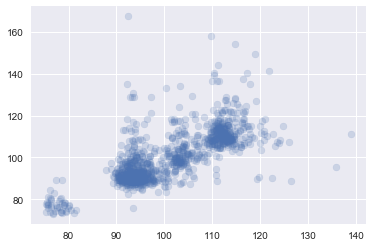

In [111]:
plt.scatter(prediction1, ytest, alpha = 0.2)

# predict with GradientBoostingRegressor 

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
gbr = GradientBoostingRegressor(random_state=1, n_estimators=150, max_depth = 6)

In [114]:
gbr.fit(Xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [115]:
prediction2 = gbr.predict(Xtest)

In [116]:
evaluation(prediction2, ytest)

r square value: 0.540404701702
slope: 0.911370397591
p_value: 1.26675195171e-179
standard error: 0.0259251805251


0.5404047017018403

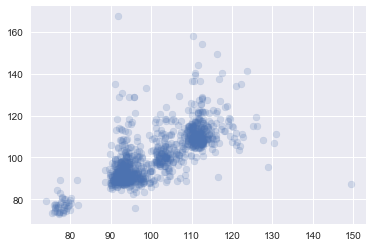

In [117]:
plt.scatter(prediction2, ytest, alpha = 0.2)

# XGBOOST


In [118]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [119]:
y_test = np.zeros(len(df_test_clean))

In [121]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,pca_8,ica_8,pca_9,ica_9,pca_10,ica_10,pca_11,ica_11,pca_12,ica_12
0,1,24,23,38,5,3,26,0,22,0,...,-1.625468,0.000301,2.410236,-0.045797,1.397995,0.014024,-0.539255,-0.054964,-1.623383,-0.008759
1,2,46,3,9,0,3,9,6,24,0,...,4.025846,-0.016028,1.996563,0.023345,-0.420568,-0.004686,0.915665,-0.020410,0.304543,-0.014028
2,3,24,23,19,5,3,0,9,9,0,...,-0.994777,-0.029682,0.482851,-0.005967,0.386352,0.003526,0.050218,-0.005409,-0.940236,-0.000839
3,4,24,13,38,5,3,32,11,13,0,...,-2.535262,0.009037,2.166933,-0.034857,-0.022042,-0.006354,-1.082122,-0.067152,-1.828352,-0.004196
4,5,49,20,19,2,3,31,8,12,0,...,1.224421,0.009723,-2.953949,0.009666,-1.279871,0.005082,0.219435,-0.062304,0.520725,0.005939


In [122]:
x_test = test.drop("ID", axis =  1)

In [123]:
x_train = train_d

In [124]:
y_train = y_label

In [125]:
import time
import xgboost as xgb

In [126]:
random_state = 0

In [127]:
dtrain = xgb.DMatrix(Xtrain.values, ytrain.values)
dvalid = xgb.DMatrix(Xtest.values, ytest.values)

dtest = xgb.DMatrix(x_test.values, y_test)
d_all_train = xgb.DMatrix(x_train.values, y_train)

In [128]:
num_boost_round = 50000

In [129]:
y_mean = np.mean(y_train)

In [134]:
eta = 0.01
max_depth = 7
subsample = 0.5
colsample_bytree = 0.5
start_time = time.time()

print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

early_stopping_rounds = 25



XGBoost params. ETA: 0.01, MAX_DEPTH: 7, SUBSAMPLE: 0.5, COLSAMPLE_BY_TREE: 0.5


In [135]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)






[0]	train-rmse:12.7223	eval-rmse:12.3969
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 25 rounds.
[1]	train-rmse:12.6867	eval-rmse:12.3602
[2]	train-rmse:12.651	eval-rmse:12.3238
[3]	train-rmse:12.6157	eval-rmse:12.2875
[4]	train-rmse:12.5805	eval-rmse:12.2514
[5]	train-rmse:12.5456	eval-rmse:12.2153
[6]	train-rmse:12.5109	eval-rmse:12.1799
[7]	train-rmse:12.4767	eval-rmse:12.1444
[8]	train-rmse:12.4428	eval-rmse:12.1097
[9]	train-rmse:12.4089	eval-rmse:12.0748
[10]	train-rmse:12.3753	eval-rmse:12.04
[11]	train-rmse:12.342	eval-rmse:12.0058
[12]	train-rmse:12.3088	eval-rmse:11.9717
[13]	train-rmse:12.2761	eval-rmse:11.938
[14]	train-rmse:12.2434	eval-rmse:11.9044
[15]	train-rmse:12.211	eval-rmse:11.8712
[16]	train-rmse:12.1787	eval-rmse:11.8383
[17]	train-rmse:12.1465	eval-rmse:11.8052
[18]	train-rmse:12.1147	eval-rmse:11.7726
[19]	train-rmse:12.0832	eval-rmse:11.7404
[20]	train-rmse:12.0518	eval-rmse

[191]	train-rmse:9.06031	eval-rmse:8.64593
[192]	train-rmse:9.05226	eval-rmse:8.63758
[193]	train-rmse:9.04405	eval-rmse:8.6292
[194]	train-rmse:9.03607	eval-rmse:8.62132
[195]	train-rmse:9.02801	eval-rmse:8.61329
[196]	train-rmse:9.02008	eval-rmse:8.60509
[197]	train-rmse:9.01223	eval-rmse:8.59722
[198]	train-rmse:9.00459	eval-rmse:8.58988
[199]	train-rmse:8.99686	eval-rmse:8.58217
[200]	train-rmse:8.98918	eval-rmse:8.57475
[201]	train-rmse:8.98167	eval-rmse:8.56736
[202]	train-rmse:8.97414	eval-rmse:8.55997
[203]	train-rmse:8.96662	eval-rmse:8.55236
[204]	train-rmse:8.95921	eval-rmse:8.54472
[205]	train-rmse:8.95194	eval-rmse:8.53756
[206]	train-rmse:8.9446	eval-rmse:8.53015
[207]	train-rmse:8.9374	eval-rmse:8.52313
[208]	train-rmse:8.9302	eval-rmse:8.51607
[209]	train-rmse:8.923	eval-rmse:8.50879
[210]	train-rmse:8.91592	eval-rmse:8.50174
[211]	train-rmse:8.90889	eval-rmse:8.49503
[212]	train-rmse:8.90191	eval-rmse:8.48803
[213]	train-rmse:8.89513	eval-rmse:8.48127
[214]	train-rmse:

[383]	train-rmse:8.15483	eval-rmse:7.92779
[384]	train-rmse:8.15269	eval-rmse:7.926
[385]	train-rmse:8.15049	eval-rmse:7.92449
[386]	train-rmse:8.14856	eval-rmse:7.92298
[387]	train-rmse:8.14442	eval-rmse:7.92212
[388]	train-rmse:8.14245	eval-rmse:7.9206
[389]	train-rmse:8.1381	eval-rmse:7.92032
[390]	train-rmse:8.13593	eval-rmse:7.91949
[391]	train-rmse:8.13385	eval-rmse:7.91791
[392]	train-rmse:8.13186	eval-rmse:7.91693
[393]	train-rmse:8.13011	eval-rmse:7.91544
[394]	train-rmse:8.12796	eval-rmse:7.91404
[395]	train-rmse:8.12615	eval-rmse:7.91266
[396]	train-rmse:8.12425	eval-rmse:7.91159
[397]	train-rmse:8.12224	eval-rmse:7.91018
[398]	train-rmse:8.11793	eval-rmse:7.90959
[399]	train-rmse:8.11573	eval-rmse:7.90845
[400]	train-rmse:8.11373	eval-rmse:7.90753
[401]	train-rmse:8.11192	eval-rmse:7.90622
[402]	train-rmse:8.1102	eval-rmse:7.90499
[403]	train-rmse:8.10599	eval-rmse:7.90367
[404]	train-rmse:8.10383	eval-rmse:7.90271
[405]	train-rmse:8.09982	eval-rmse:7.90277
[406]	train-rmse

In [136]:
ypred = gbm.predict(dvalid)

In [137]:
evaluation(ypred,ytest)

r square value: 0.606390380475
slope: 1.10506193986
p_value: 5.08650235885e-215
standard error: 0.0274626197458


0.6063903804745947

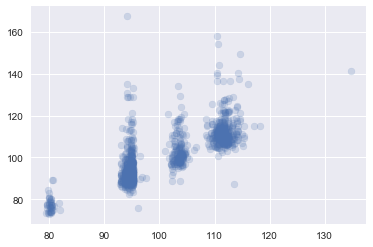

In [138]:
plt.scatter(ypred, ytest, alpha = 0.2)

#  kaggles code imported here

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder


# read datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# process columns, apply LabelEncoder to categorical features
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))


##Add decomposed components: PCA / ICA etc.
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
n_comp = 12

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=42)
tsvd_results_train = tsvd.fit_transform(train.drop(["y"], axis=1))
tsvd_results_test = tsvd.transform(test)

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
#    train['tsvd_' + str(i)] = tsvd_results_train[:,i-1]
#    test['tsvd_' + str(i)] = tsvd_results_test[:, i-1]
    
y_train = train["y"]
y_mean = np.mean(y_train)



### Regressor
import xgboost as xgb

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}


# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test)

# xgboost, cross-validation
#cv_result = xgb.cv(xgb_params, 
#                   dtrain, 
#                   num_boost_round=1000, # increase to have better results (~700)
#                   early_stopping_rounds=50,
#                   verbose_eval=10, 
#                   show_stdv=False
#                  )

#num_boost_rounds = len(cv_result)
#print('num_boost_rounds=' + str(num_boost_rounds))

num_boost_rounds = 1500
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)


# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score
print(r2_score(model.predict(dtrain), dtrain.get_label()))

# make predictions and save results
y_pred = model.predict(dtest)

output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('submission_baseLine.csv', index=False)

Shape train: (4209, 378)
Shape test: (4209, 377)
0.480194452227


In [84]:
evaluation(model.predict(dtrain), dtrain.get_label())

r square value: 0.707438198937
slope: 1.10838661015
p_value: 0.0
standard error: 0.0109892884227


0.7074381989366092

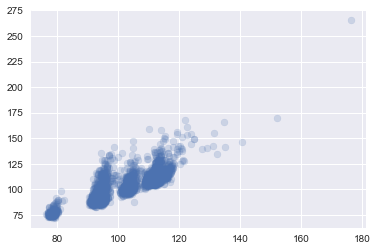

In [86]:
plt.scatter(model.predict(dtrain), dtrain.get_label(), alpha = 0.2)

#  final prediction

In [109]:
prediction_rf = clf1.predict(df_test_clean)

In [110]:
prediction_gb = gbr.predict(df_test_clean) 

In [111]:
prediction_xgboost = gbm.predict(dtest)

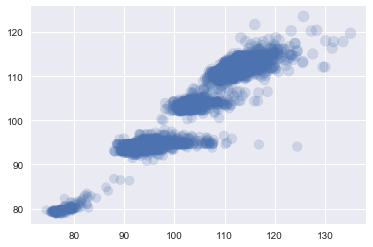

In [112]:
plt.scatter(prediction_rf, prediction_xgboost,prediction_xgboost, alpha = 0.2)

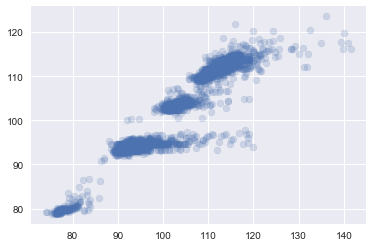

In [113]:
plt.scatter(prediction_gb, prediction_xgboost, alpha = 0.2)

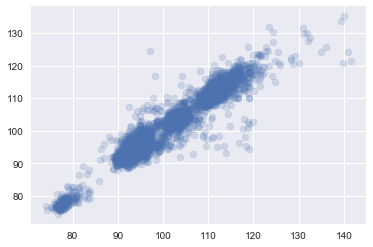

In [114]:
plt.scatter(prediction_gb, prediction_rf, alpha = 0.2)

In [115]:
final_prediction2 = 0.8*prediction_xgboost + 0.1* prediction_gb + 0.1*prediction_rf

In [116]:
df_submission = pd.read_csv("sample_submission.csv")

In [117]:
df_submission['y']= final_prediction2

In [118]:
df_submission.head()

,ID,y
0,1,80.025600
1,2,95.258169
2,3,79.694958
3,4,79.659325
4,5,115.602622


In [119]:
df_submission.to_csv('3-way_ver8.csv', index = False)